
태풍,날씨와 해상 사고 발생률의
관계를 알아보기 위해 분석함

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
from io import IncrementalNewlineDecoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
# csv파일 읽어옴
original_data = pd.read_csv('/content/drive/MyDrive/빅데이터 분석/빅분2/수행/2학기 데이터 분석 수행/데이터/해양경찰청_해상조난사고 상세데이터 통계 현황_20211231.csv',encoding = 'cp949')
original_data

,발생일시,관할서,발생해역,위도(도),위도(분),위도(초),경도(도),경도(분),경도(초),기상상태,발생원인,발생유형,사고선박수,발생인원,구조,부상,사망,실종,선종,톤수
0,2021-12-30 11:40,속초,영해,37,53,2,128,50,51,풍랑주의보,운항부주의,부유물감김,1,3,3,0,0,0,어선,3.35
1,2021-12-30 08:40,속초,영해,37,52,23,128,57,24,풍랑주의보,정비불량,기관손상,1,4,4,0,0,0,어선,4.99
2,2021-12-30 08:14,창원,항계 내,35,11,35,128,35,26,양호,운항부주의,충돌,1,2,2,0,0,0,예부선,80.00
3,2021-12-30 08:14,창원,항계 내,35,11,35,128,35,26,양호,운항부주의,충돌,1,1,1,0,0,0,예부선,6117.00
4,2021-12-29 16:13,목포,항계 내,34,32,3,125,57,59,양호,정비불량,기관손상,1,11,11,0,0,0,예부선,144.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3877,2021-01-01 15:31,울산,영해,35,20,54,129,21,48,양호,정비불량,기관손상,1,1,1,0,0,0,어선,1.93
3878,2021-01-01 12:02,창원,영해,34,46,6,128,41,22,양호,정비불량,기관손상,1,15,15,0,0,0,낚시어선,6.49
3879,2021-01-01 12:01,통영,협수로,34,46,50,128,41,21,양호,정비불량,기관손상,1,15,15,0,0,0,낚시어선,6.49
3880,2021-01-01 11:45,여수,영해,34,36,27,127,39,39,양호,운항부주의,충돌,1,12,12,0,0,0,어선,24.00


In [ ]:
# csv파일 데이터를 df변수에 복사
df = original_data.copy()
print(df.shape)
df.head()

(3882, 20)


,발생일시,관할서,발생해역,위도(도),위도(분),위도(초),경도(도),경도(분),경도(초),기상상태,발생원인,발생유형,사고선박수,발생인원,구조,부상,사망,실종,선종,톤수
0,2021-12-30 11:40,속초,영해,37,53,2,128,50,51,풍랑주의보,운항부주의,부유물감김,1,3,3,0,0,0,어선,3.35
1,2021-12-30 08:40,속초,영해,37,52,23,128,57,24,풍랑주의보,정비불량,기관손상,1,4,4,0,0,0,어선,4.99
2,2021-12-30 08:14,창원,항계 내,35,11,35,128,35,26,양호,운항부주의,충돌,1,2,2,0,0,0,예부선,80.00
3,2021-12-30 08:14,창원,항계 내,35,11,35,128,35,26,양호,운항부주의,충돌,1,1,1,0,0,0,예부선,6117.00
4,2021-12-29 16:13,목포,항계 내,34,32,3,125,57,59,양호,정비불량,기관손상,1,11,11,0,0,0,예부선,144.00


In [ ]:
# 발생일시 기준으로 오름차순 정렬
df = df.sort_values('발생일시').reset_index(drop=True)
df

,발생일시,관할서,발생해역,위도(도),위도(분),위도(초),경도(도),경도(분),경도(초),기상상태,발생원인,발생유형,사고선박수,발생인원,구조,부상,사망,실종,선종,톤수
0,2021-01-01 11:45,여수,영해,34,36,27,127,39,39,양호,운항부주의,충돌,1,57,57,0,0,0,여객선,242.00
1,2021-01-01 11:45,여수,영해,34,36,27,127,39,39,양호,운항부주의,충돌,1,12,12,0,0,0,어선,24.00
2,2021-01-01 12:01,통영,협수로,34,46,50,128,41,21,양호,정비불량,기관손상,1,15,15,0,0,0,낚시어선,6.49
3,2021-01-01 12:02,창원,영해,34,46,6,128,41,22,양호,정비불량,기관손상,1,15,15,0,0,0,낚시어선,6.49
4,2021-01-01 15:31,울산,영해,35,20,54,129,21,48,양호,정비불량,기관손상,1,1,1,0,0,0,어선,1.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3877,2021-12-29 16:13,목포,항계 내,34,32,3,125,57,59,양호,정비불량,기관손상,1,11,11,0,0,0,예부선,144.00
3878,2021-12-30 08:14,창원,항계 내,35,11,35,128,35,26,양호,운항부주의,충돌,1,1,1,0,0,0,예부선,6117.00
3879,2021-12-30 08:14,창원,항계 내,35,11,35,128,35,26,양호,운항부주의,충돌,1,2,2,0,0,0,예부선,80.00
3880,2021-12-30 08:40,속초,영해,37,52,23,128,57,24,풍랑주의보,정비불량,기관손상,1,4,4,0,0,0,어선,4.99


In [ ]:
# null값 확인
df.isnull().sum()

발생일시     0
관할서      0
발생해역     0
위도(도)    0
위도(분)    0
위도(초)    0
경도(도)    0
경도(분)    0
경도(초)    0
기상상태     0
발생원인     0
발생유형     0
사고선박수    0
발생인원     0
구조       0
부상       0
사망       0
실종       0
선종       0
톤수       0
dtype: int64

In [ ]:
# 데이터 프레임 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3882 entries, 0 to 3881
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   발생일시    3882 non-null   object 
 1   관할서     3882 non-null   object 
 2   발생해역    3882 non-null   object 
 3   위도(도)   3882 non-null   int64  
 4   위도(분)   3882 non-null   int64  
 5   위도(초)   3882 non-null   int64  
 6   경도(도)   3882 non-null   int64  
 7   경도(분)   3882 non-null   int64  
 8   경도(초)   3882 non-null   int64  
 9   기상상태    3882 non-null   object 
 10  발생원인    3882 non-null   object 
 11  발생유형    3882 non-null   object 
 12  사고선박수   3882 non-null   int64  
 13  발생인원    3882 non-null   int64  
 14  구조      3882 non-null   int64  
 15  부상      3882 non-null   int64  
 16  사망      3882 non-null   int64  
 17  실종      3882 non-null   int64  
 18  선종      3882 non-null   object 
 19  톤수      3882 non-null   float64
dtypes: float64(1), int64(12), object(7)
memory usage: 606.7+ KB


In [ ]:
# 관할서의 속성 값을 세어서 어떤 지역에서 많이 발생했는지 확인
df['관할서'].value_counts()

목포     384
통영     308
인천     292
여수     284
보령     254
부산     234
포항     233
제주     228
태안     205
서귀포    204
창원     191
군산     187
평택     179
동해     148
울산     147
완도     130
부안     107
울진      88
속초      79
Name: 관할서, dtype: int64

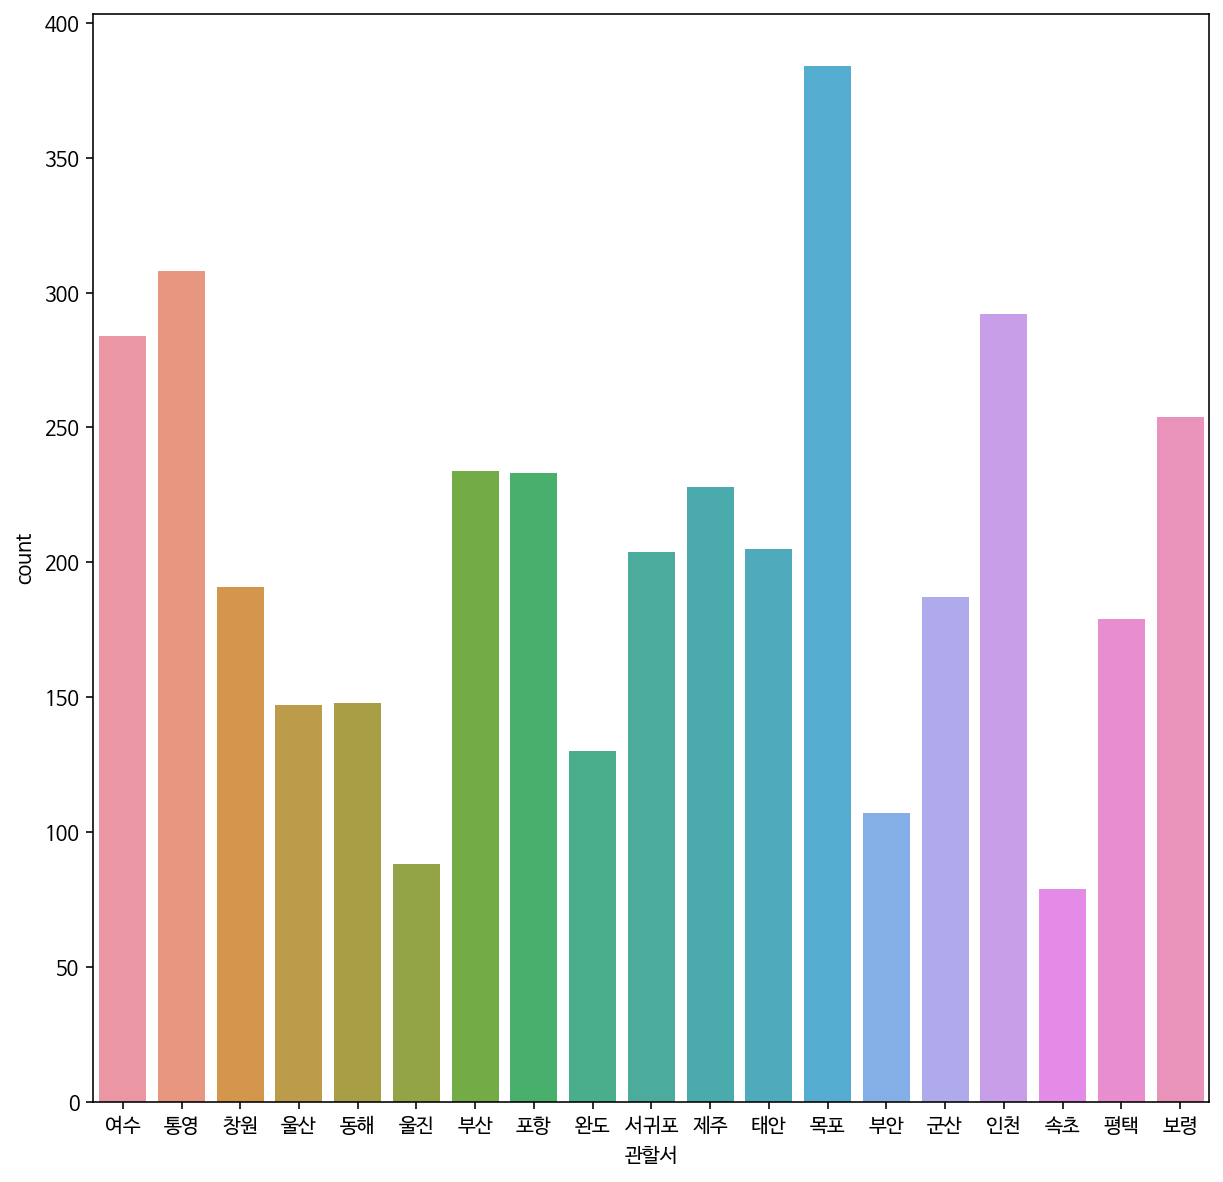

In [ ]:
# 관할서 별 사고 발생률 시각화
plt.figure(figsize=(10,10))
sns.countplot(data = df,x = df['관할서'])

In [ ]:
# 어떤 해역에서 사고가 많이 생겼는지 확인
df['발생해역'].value_counts()

영해        1900
항계 내      1474
영해-EEZ     249
협수로        230
공해          24
외국해역         5
Name: 발생해역, dtype: int64

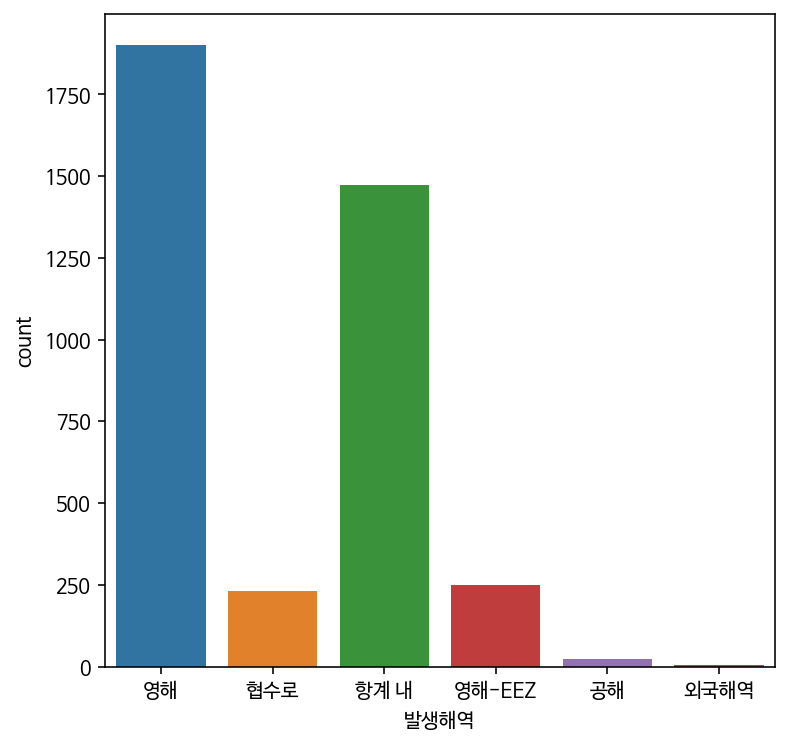

In [ ]:
# 해역 별 사고 발생률 시각화
plt.figure(figsize=(6,6))
sns.countplot(data = df,x = df['발생해역'])

In [ ]:
# 어떤 기상상태에서 사고가 발생했는지 확인
df['기상상태'].value_counts()

양호       3567
풍랑주의보     116
황천6급       64
황천5급       58
저시정        49
황천4급       21
풍랑경보        4
태풍경보        3
Name: 기상상태, dtype: int64

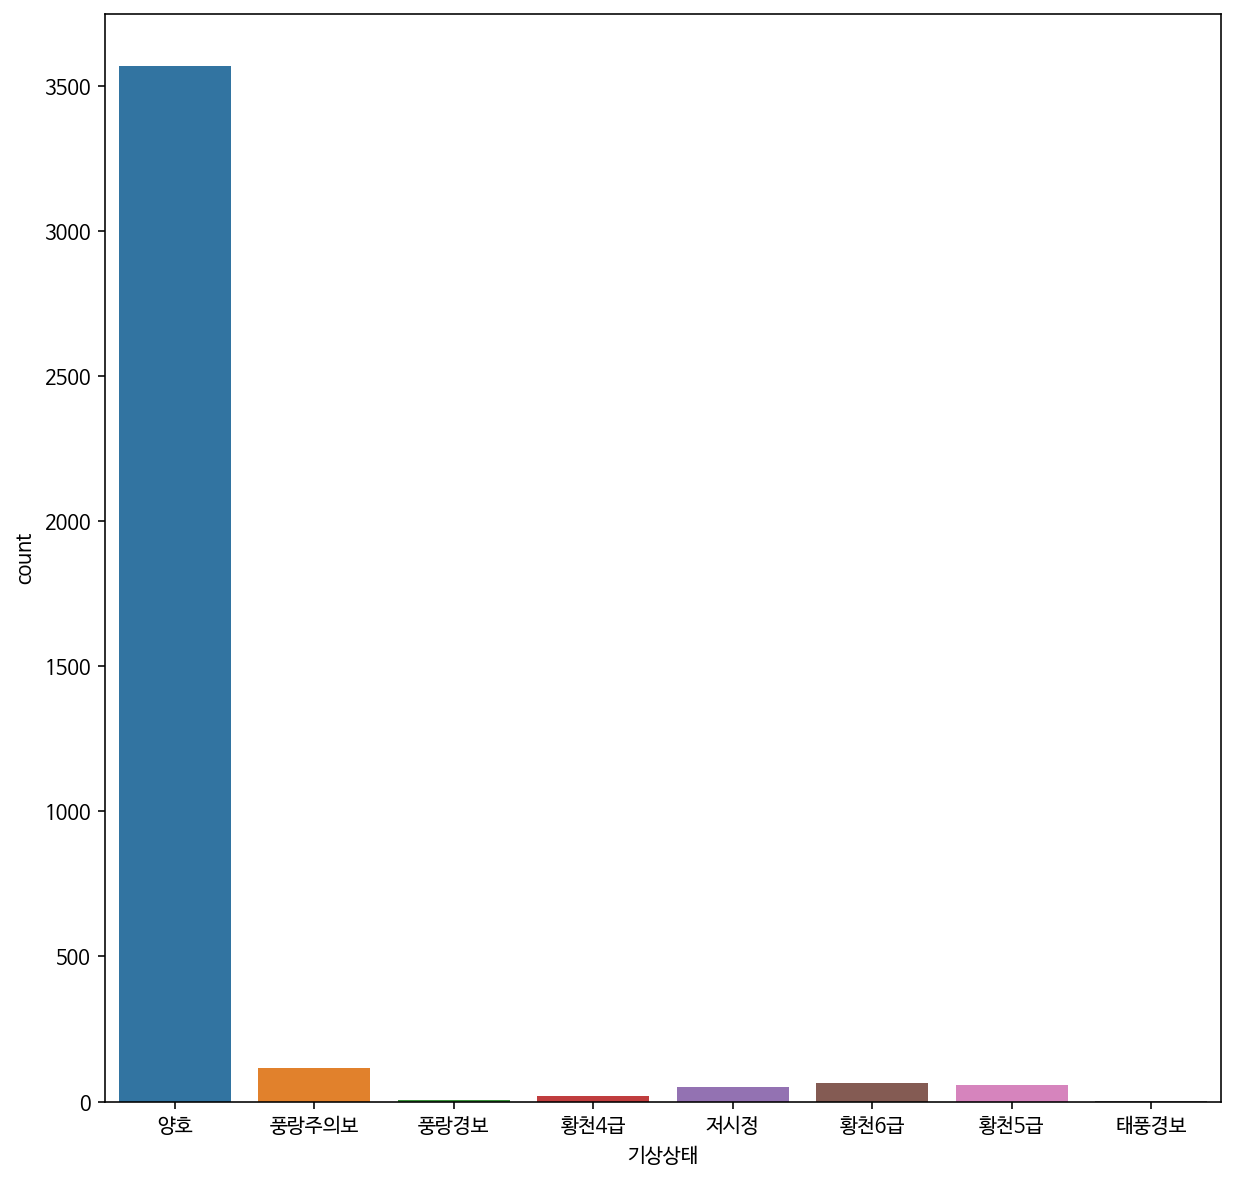

In [ ]:
# 기상상태 별 사고 발생률 시각화
plt.figure(figsize=(10,10))
sns.countplot(data = df,x = df['기상상태'])

In [ ]:
# 어떤 발생원인에서 사고가 발생했는지 확인
df['발생원인'].value_counts()

정비불량       1472
운항부주의      1236
관리소홀        459
안전부주의       175
원인미상        141
기상악화        103
배터리 방전       98
연료고갈         96
기타           45
화기취급부주의      34
재질불량         15
적재불량          8
Name: 발생원인, dtype: int64

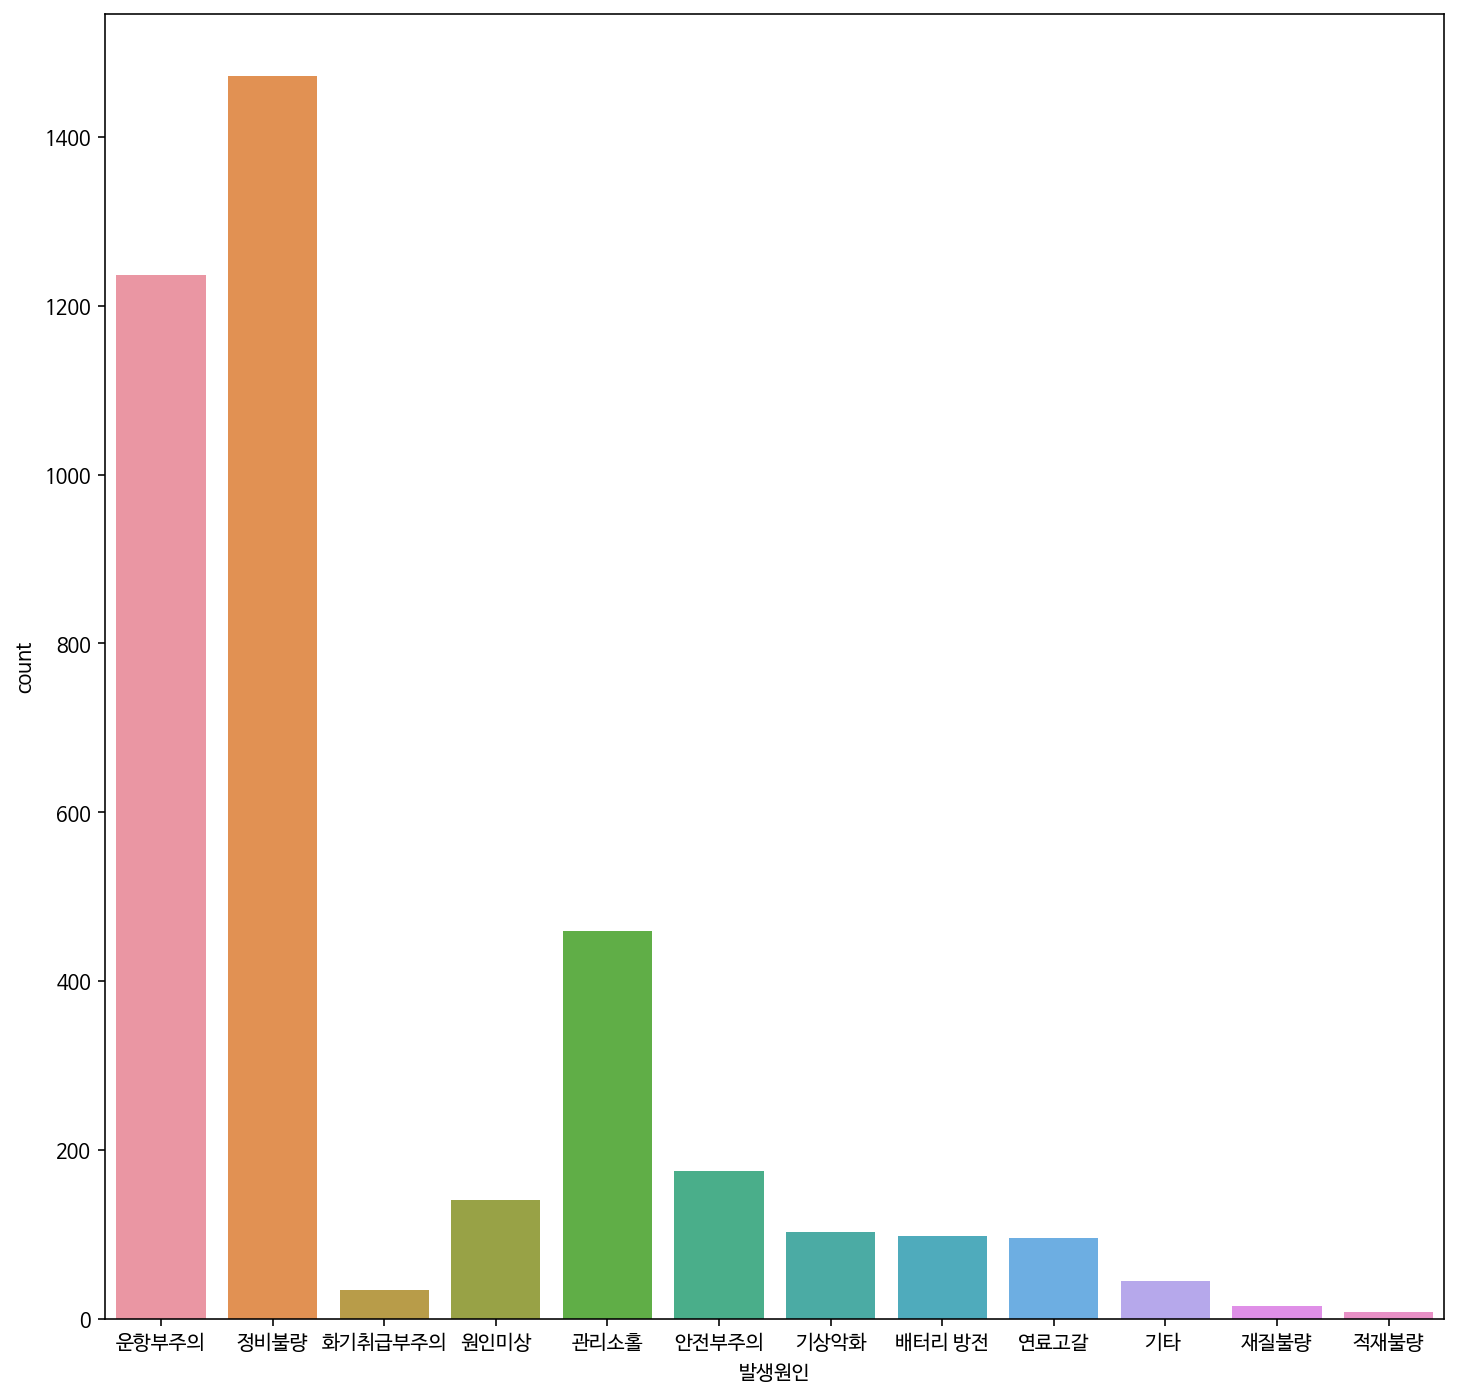

In [ ]:
# 발생원인 별 사고 발생률 시각화
plt.figure(figsize=(12,12))
sns.countplot(data = df,x = df['발생원인'])

In [ ]:
# 어떤 발생유형에서 사고가 발생했는지 확인
df['발생유형'].value_counts()

기관손상         1144
부유물감김         542
충돌            330
운항저해          291
침수            269
추진기손상         238
좌초/좌주         198
화재            192
표류            165
키손상            98
작업 중 인명사상      89
전복             88
접촉             76
해양오염           68
침몰             31
기타             23
방향상실           22
시설물손상           7
속구손상            6
실종(인명)          3
폭발              2
Name: 발생유형, dtype: int64

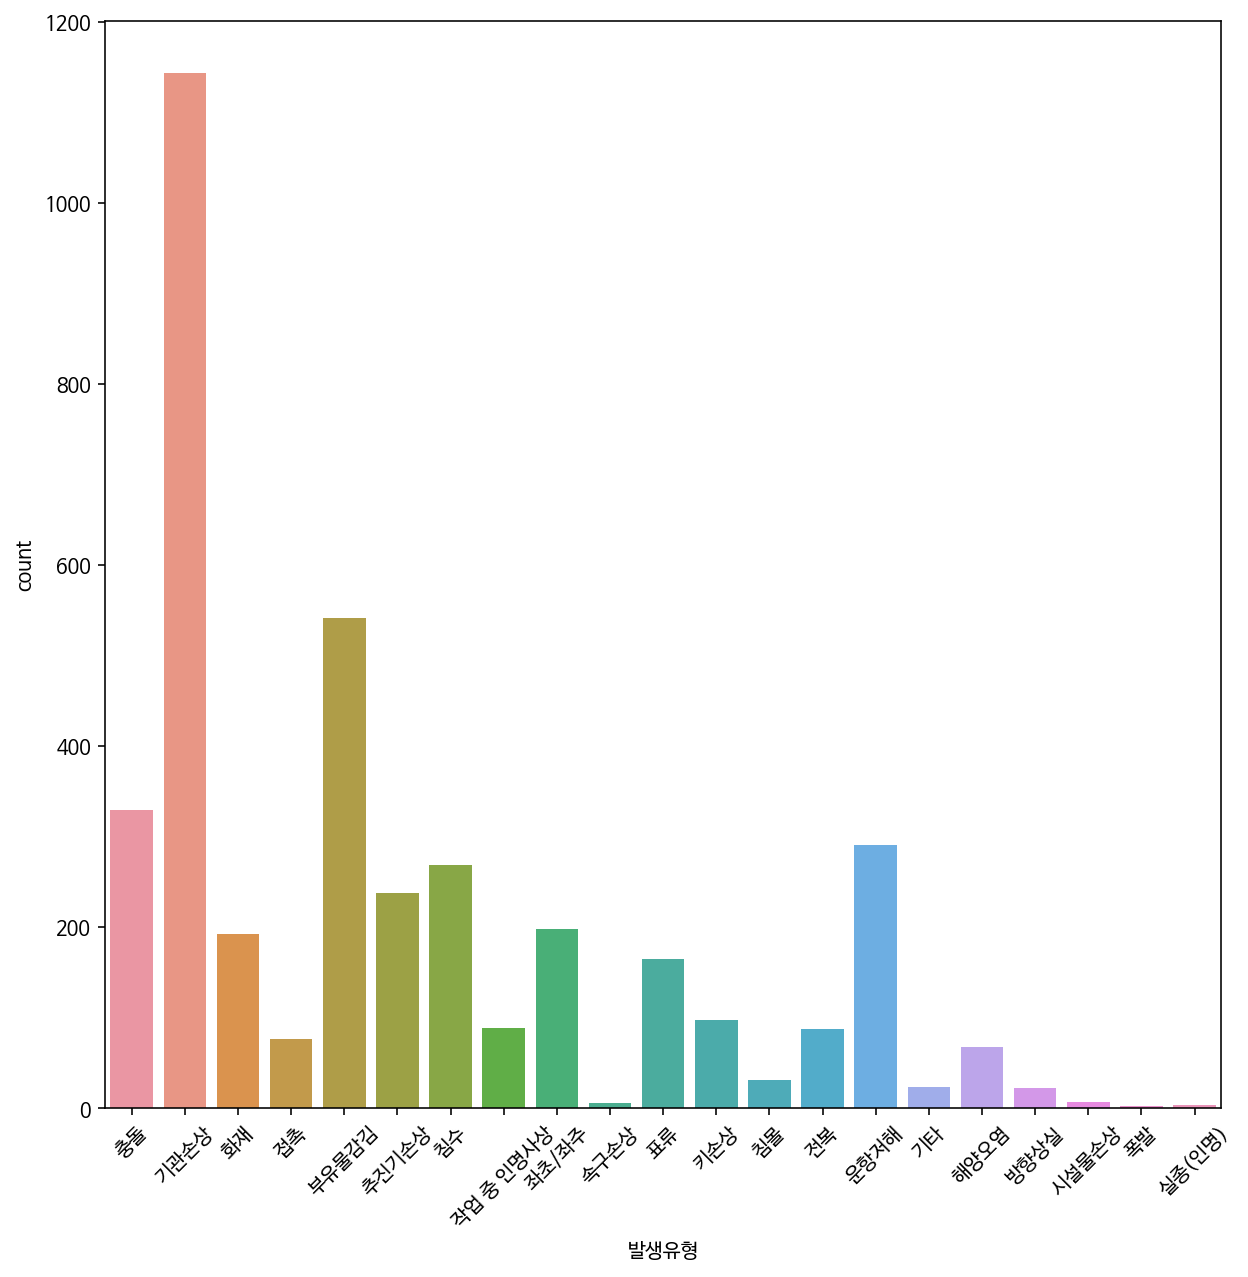

In [ ]:
# 발생유형 별 사고 발생률 시각화
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
sns.countplot(data = df,x = df['발생유형'])

In [ ]:
# 선종 별 사고 발생수
df['선종'].value_counts()

어선      1857
모터보트     728
낚시어선     312
예부선      239
고무보트     192
화물선      171
기타       147
요트        80
유조선       78
여객선       40
관공선       23
유도선       15
Name: 선종, dtype: int64

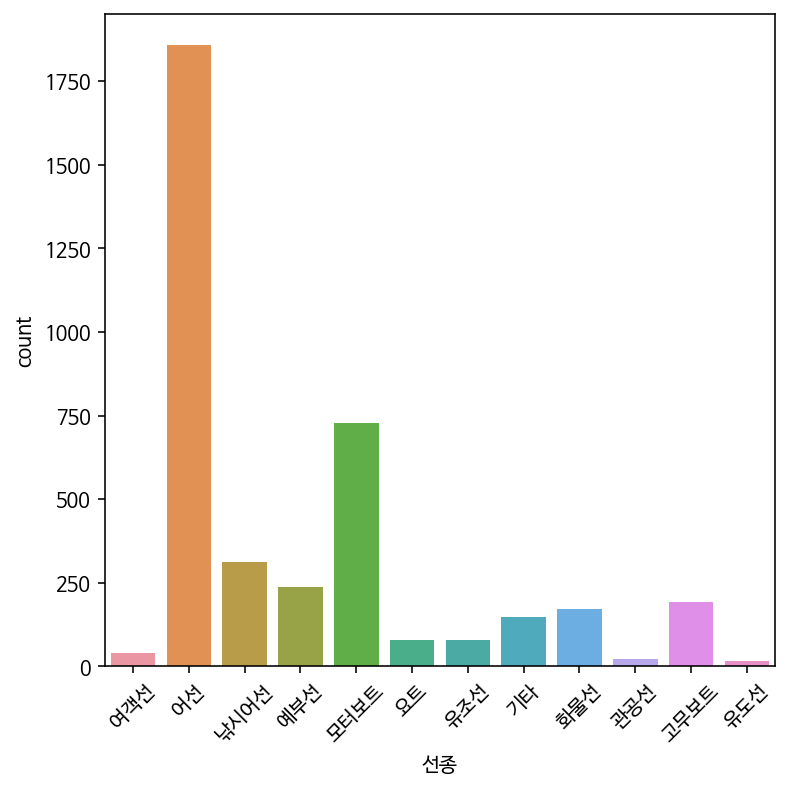

In [ ]:
# 선종 별 사고 발생수 시각화
plt.figure(figsize=(6,6))
plt.xticks(rotation=45)
sns.countplot(data = df,x = df['선종'])

In [ ]:
# 2021년 태풍 발생 건수 데이터 불러옴
original_typhoon = pd.read_csv('/content/drive/MyDrive/빅데이터 분석/빅분2/수행/2학기 데이터 분석 수행/데이터/FCT_태풍발생표_20221024091332.csv',encoding = 'cp949')
original_typhoon

,년,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연합계
0,2021,0(0),1(0),0(0),1(0),1(0),2(0),3(0),4(2),4(1),4(0),1(0),1(0),22(3)


In [ ]:
# 원본 데이터를 복사해옴
typhoon = original_typhoon.copy()
typhoon.shape

(1, 14)

In [ ]:
# 연도와 연합계는 필요가 없으므로 제거
typhoon = typhoon.drop([typhoon.columns[0],typhoon.columns[13]],axis=1)
typhoon

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,0(0),1(0),0(0),1(0),1(0),2(0),3(0),4(2),4(1),4(0),1(0),1(0)


In [ ]:
# 값을 int형으로 바꿔주기 위해 값을 숫자로 변경
typhoon.loc[0] = [0,1,0,1,1,2,3,4,4,4,1,1]
typhoon

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,0,1,0,1,1,2,3,4,4,4,1,1


In [ ]:
# 타입을 int 형으로 변경함
typhoon = typhoon.astype(int)
typhoon.dtypes

1월     int64
2월     int64
3월     int64
4월     int64
5월     int64
6월     int64
7월     int64
8월     int64
9월     int64
10월    int64
11월    int64
12월    int64
dtype: object

In [ ]:
# 태풍 발생 월은 2, 4, 5, 6, 7, 8, 9, 10, 11, 12 월임 해당 월의 사고 발생 건수를 세어 어떤 연관이 있을지 확인함
# 데이터 프레임의 발생일시 데이터에서 월만 가져옴
month_original = df['발생일시']
month=[]
for i in month_original:
  month.append(i[5:7])
len(month)

3882

In [ ]:
# 월만 따로 떼어 데이터 프레임에 추가
df['month'] = month
df

,발생일시,관할서,발생해역,위도(도),위도(분),위도(초),경도(도),경도(분),경도(초),기상상태,...,발생유형,사고선박수,발생인원,구조,부상,사망,실종,선종,톤수,month
0,2021-01-01 11:45,여수,영해,34,36,27,127,39,39,양호,...,충돌,1,57,57,0,0,0,여객선,242.00,01
1,2021-01-01 11:45,여수,영해,34,36,27,127,39,39,양호,...,충돌,1,12,12,0,0,0,어선,24.00,01
2,2021-01-01 12:01,통영,협수로,34,46,50,128,41,21,양호,...,기관손상,1,15,15,0,0,0,낚시어선,6.49,01
3,2021-01-01 12:02,창원,영해,34,46,6,128,41,22,양호,...,기관손상,1,15,15,0,0,0,낚시어선,6.49,01
4,2021-01-01 15:31,울산,영해,35,20,54,129,21,48,양호,...,기관손상,1,1,1,0,0,0,어선,1.93,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3877,2021-12-29 16:13,목포,항계 내,34,32,3,125,57,59,양호,...,기관손상,1,11,11,0,0,0,예부선,144.00,12
3878,2021-12-30 08:14,창원,항계 내,35,11,35,128,35,26,양호,...,충돌,1,1,1,0,0,0,예부선,6117.00,12
3879,2021-12-30 08:14,창원,항계 내,35,11,35,128,35,26,양호,...,충돌,1,2,2,0,0,0,예부선,80.00,12
3880,2021-12-30 08:40,속초,영해,37,52,23,128,57,24,풍랑주의보,...,기관손상,1,4,4,0,0,0,어선,4.99,12


In [ ]:
# 월별 사고발생건수
df['month'].value_counts()

09    465
10    452
11    363
08    353
06    339
07    328
03    302
05    292
04    289
12    265
01    226
02    208
Name: month, dtype: int64

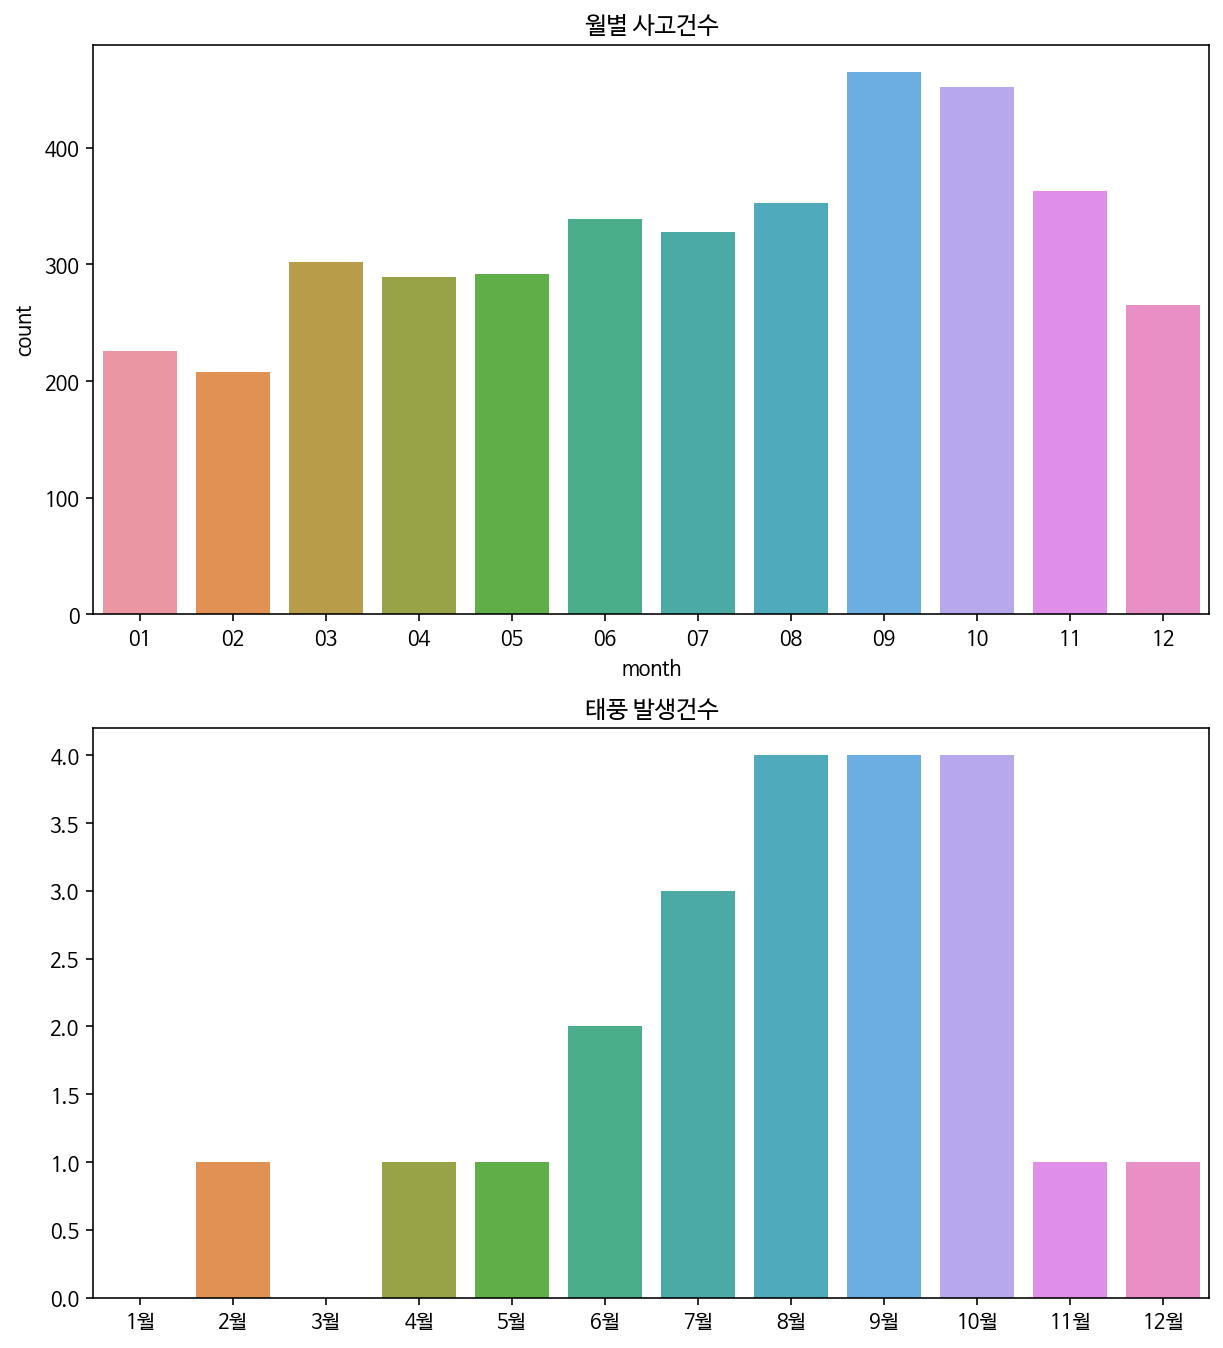

In [ ]:
# 월별 사고건수와 태풍 발생건수를 비교해 어떤 연관이 있는지 확인
plt.figure(figsize=(10,10))

plt.subplot(211)
sns.countplot(data = df,x = df['month'])
plt.title('월별 사고건수')

plt.subplot(212)
sns.barplot(data = typhoon)
plt.title('태풍 발생건수')

plt.subplots_adjust(bottom=0.01)


사상자 수를 알아보고 여러 요인과 사상자 수의 관계를 알아본다.

In [ ]:
df

,발생일시,관할서,발생해역,위도(도),위도(분),위도(초),경도(도),경도(분),경도(초),기상상태,...,발생유형,사고선박수,발생인원,구조,부상,사망,실종,선종,톤수,month
0,2021-01-01 11:45,여수,영해,34,36,27,127,39,39,양호,...,충돌,1,57,57,0,0,0,여객선,242.00,01
1,2021-01-01 11:45,여수,영해,34,36,27,127,39,39,양호,...,충돌,1,12,12,0,0,0,어선,24.00,01
2,2021-01-01 12:01,통영,협수로,34,46,50,128,41,21,양호,...,기관손상,1,15,15,0,0,0,낚시어선,6.49,01
3,2021-01-01 12:02,창원,영해,34,46,6,128,41,22,양호,...,기관손상,1,15,15,0,0,0,낚시어선,6.49,01
4,2021-01-01 15:31,울산,영해,35,20,54,129,21,48,양호,...,기관손상,1,1,1,0,0,0,어선,1.93,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3877,2021-12-29 16:13,목포,항계 내,34,32,3,125,57,59,양호,...,기관손상,1,11,11,0,0,0,예부선,144.00,12
3878,2021-12-30 08:14,창원,항계 내,35,11,35,128,35,26,양호,...,충돌,1,1,1,0,0,0,예부선,6117.00,12
3879,2021-12-30 08:14,창원,항계 내,35,11,35,128,35,26,양호,...,충돌,1,2,2,0,0,0,예부선,80.00,12
3880,2021-12-30 08:40,속초,영해,37,52,23,128,57,24,풍랑주의보,...,기관손상,1,4,4,0,0,0,어선,4.99,12


In [ ]:
df[['발생인원','구조','부상','사망','실종']]

,발생인원,구조,부상,사망,실종
0,57,57,0,0,0
1,12,12,0,0,0
2,15,15,0,0,0
3,15,15,0,0,0
4,1,1,0,0,0
...,...,...,...,...,...
3877,11,11,0,0,0
3878,1,1,0,0,0
3879,2,2,0,0,0
3880,4,4,0,0,0


In [ ]:
print('발생인원 : ',df['발생인원'].sum())
print('구조 : ',df['구조'].sum())
print('부상 : ',df['부상'].sum())
print('사망 : ',df['사망'].sum())
print('실종 : ',df['실종'].sum())

발생인원 :  20174
구조 :  20108
부상 :  196
사망 :  43
실종 :  23


In [ ]:
# 발생 유형은 무엇이 있는지 확인
df['발생유형'].unique()

array(['충돌', '기관손상', '화재', '접촉', '부유물감김', '추진기손상', '침수', '작업 중 인명사상',
       '좌초/좌주', '속구손상', '표류', '키손상', '침몰', '전복', '운항저해', '기타', '해양오염',
       '방향상실', '시설물손상', '폭발', '실종(인명)'], dtype=object)

In [ ]:
# 사상자 수를 모두 더해 변수에 저장함
casualties = ['부상','사망','실종']
cas = []
for i in range(0,3882):
  cas.append(df.loc[i,casualties].sum())

In [ ]:
# 더한 사상자 수를 데이터 프레임에 추가
df['사상자수'] =cas 

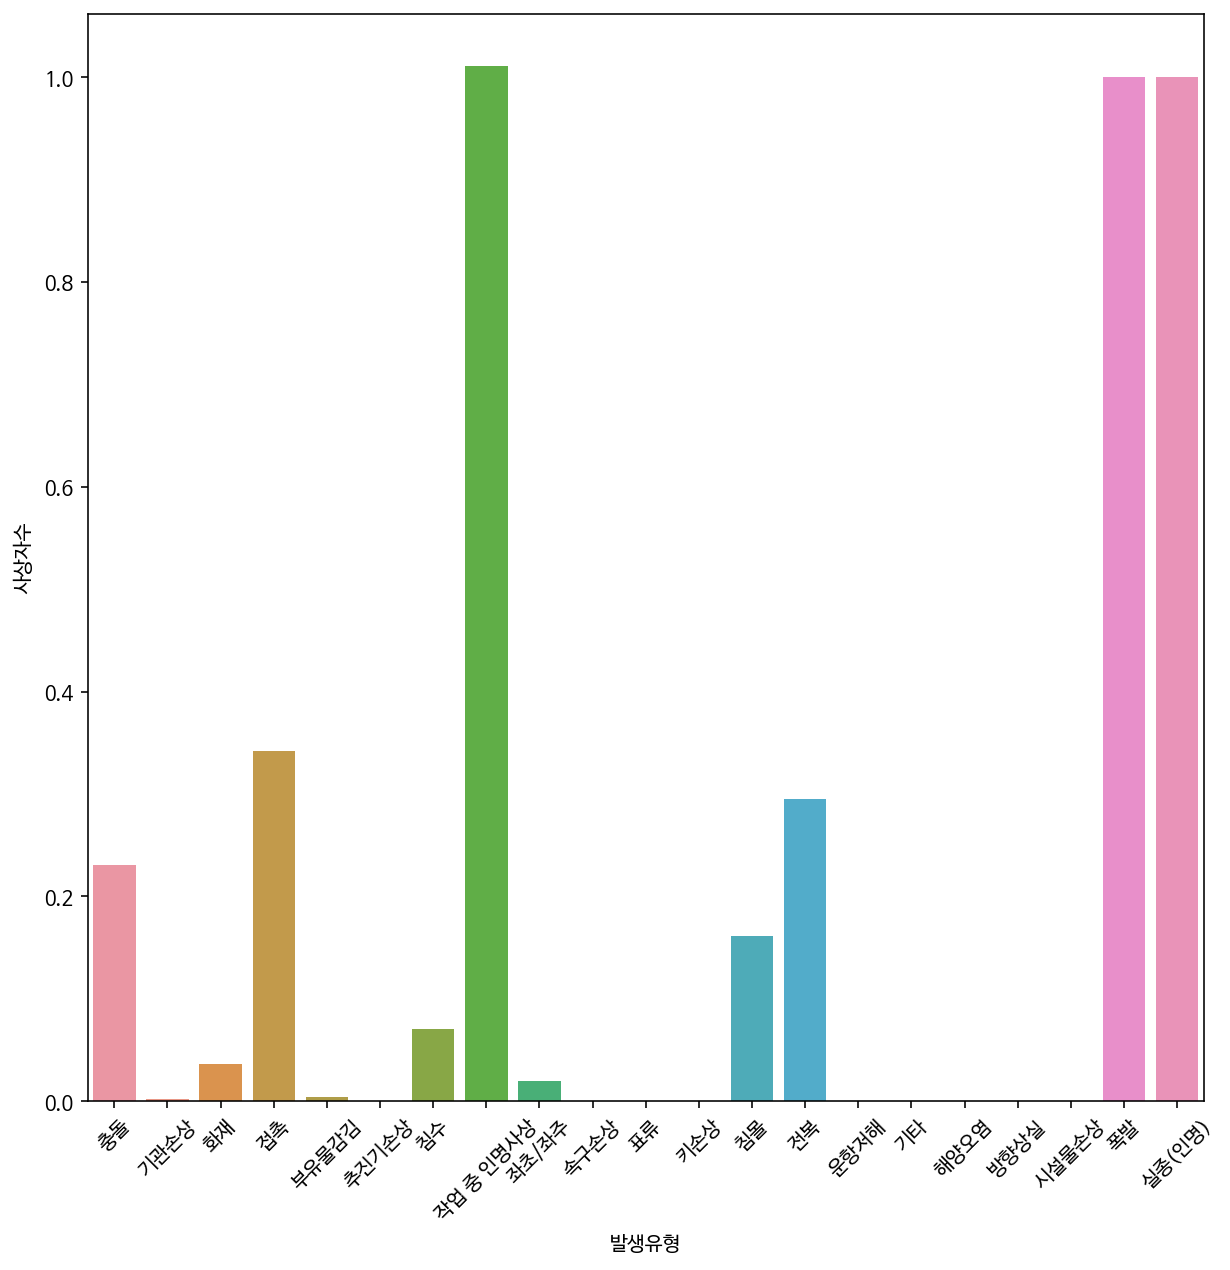

In [ ]:
# 발생유형에 따른 사상자 수 확인
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
sns.barplot(data = df,x='발생유형',y='사상자수',ci = None)

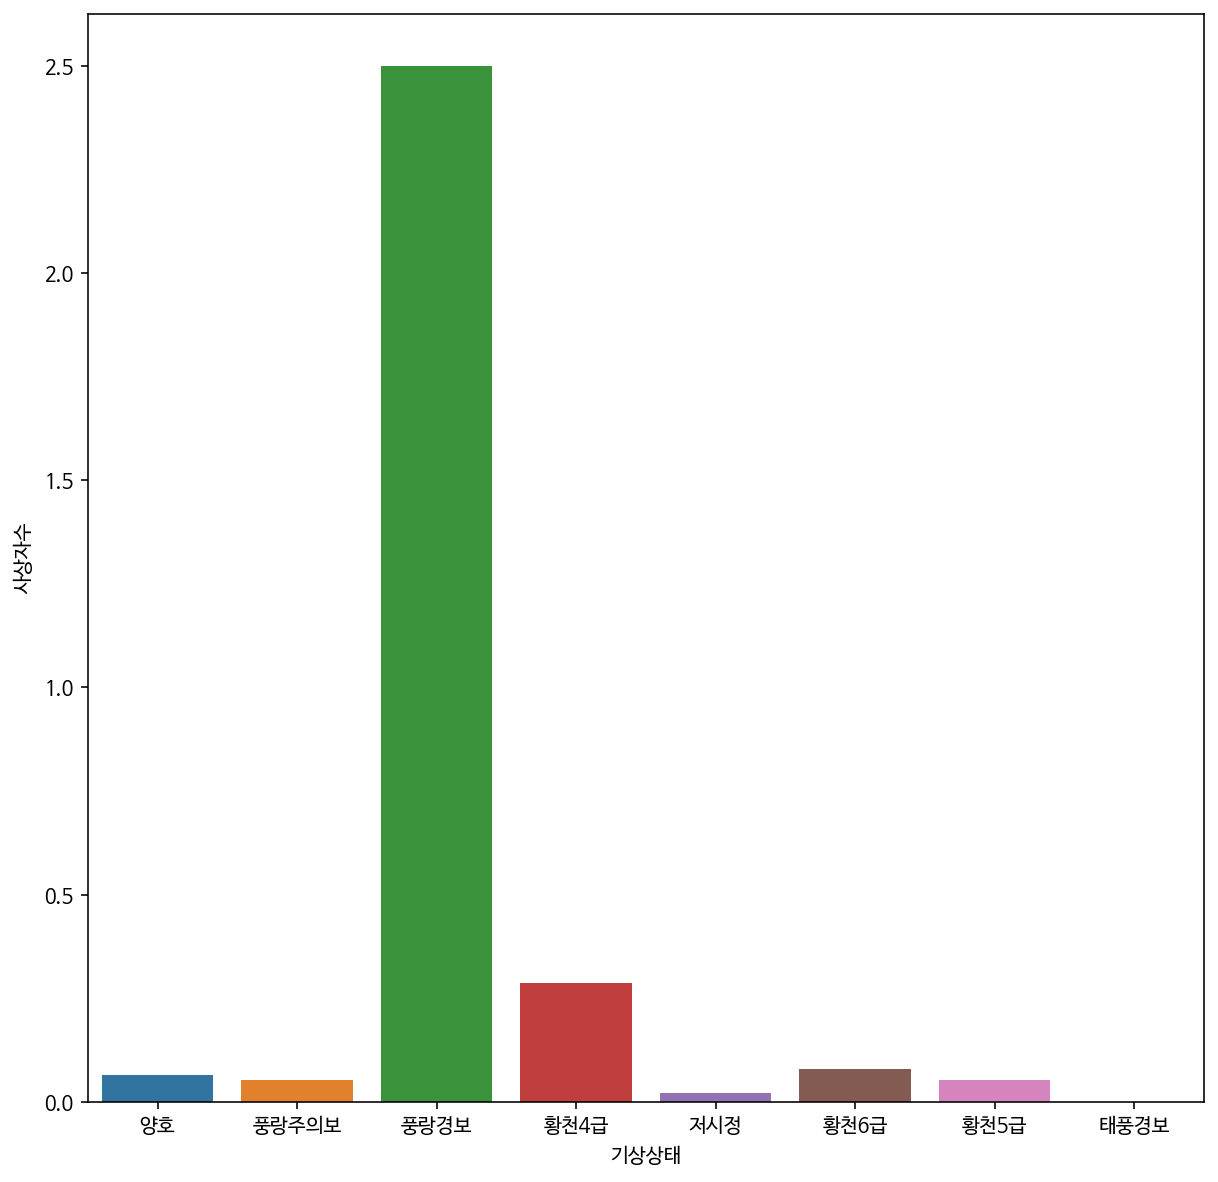

In [ ]:
# 기상상태에 따른 사상자 수 확인
plt.figure(figsize=(10,10))
sns.barplot(data = df,x='기상상태',y='사상자수',ci = None)

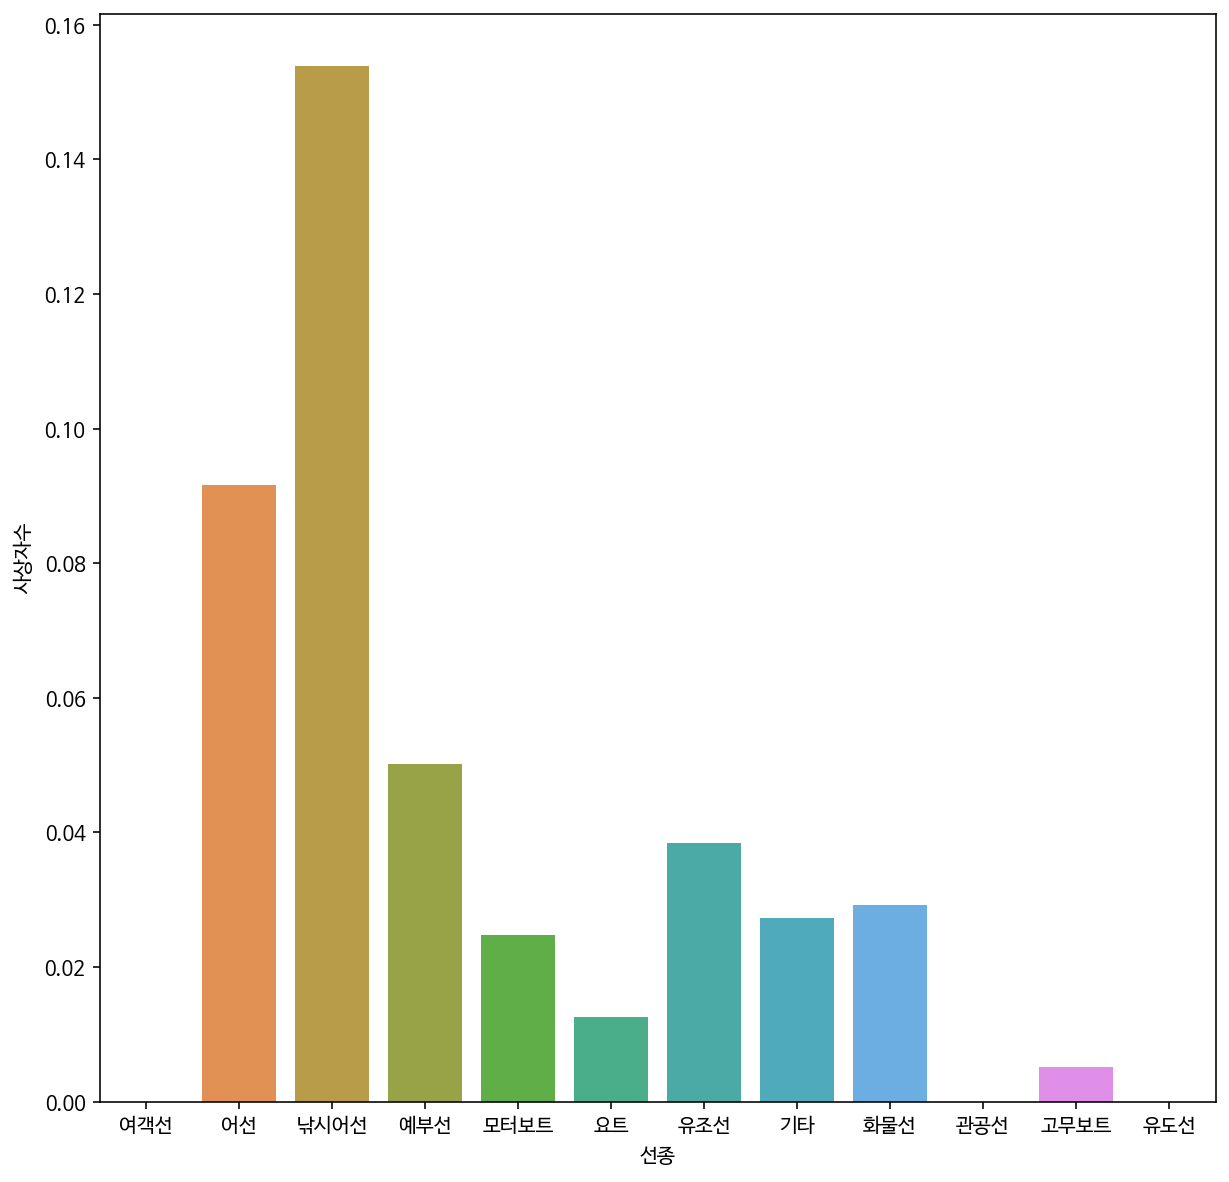

In [ ]:
# 선종에 따른 사상자 수 확인
plt.figure(figsize=(10,10))
sns.barplot(data = df,x='선종',y='사상자수',ci = None)

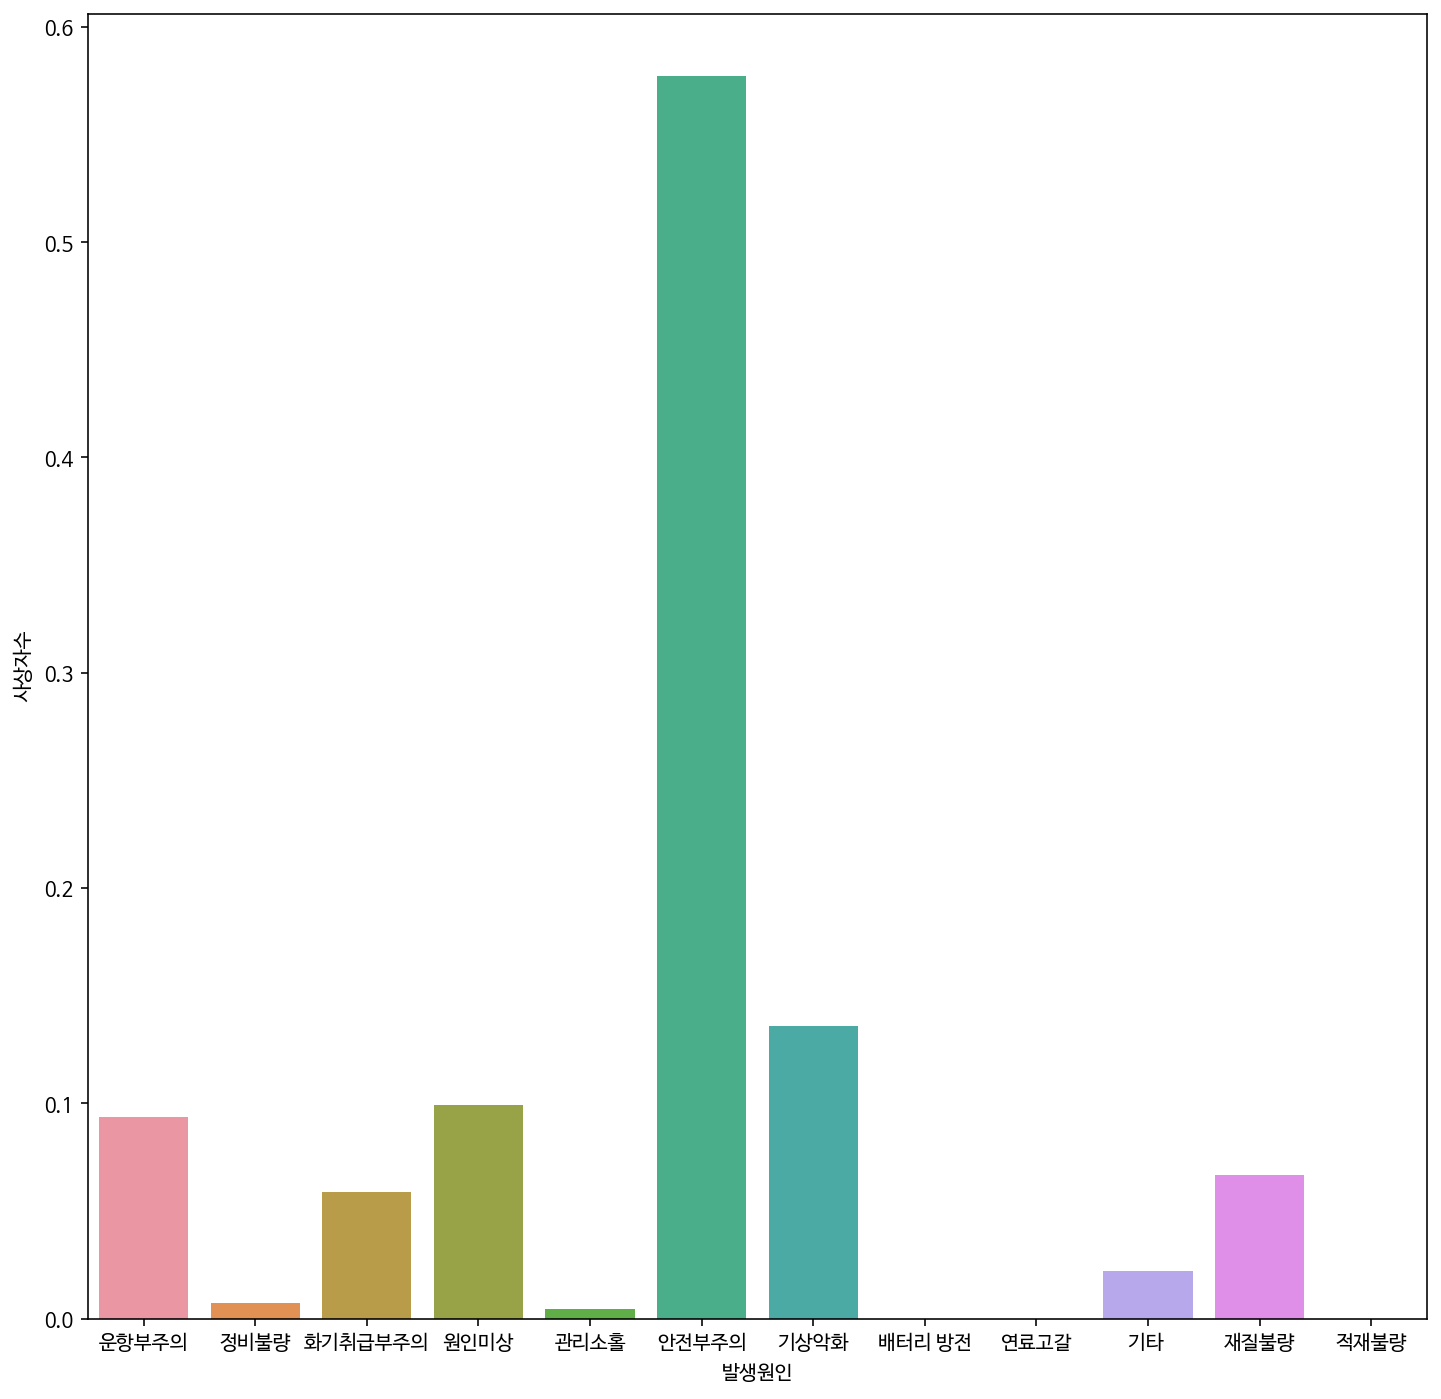

In [ ]:
# 발생원인에 따른 사상자 수 확인
plt.figure(figsize=(12,12))
sns.barplot(data = df,x='발생원인',y='사상자수',ci = None)

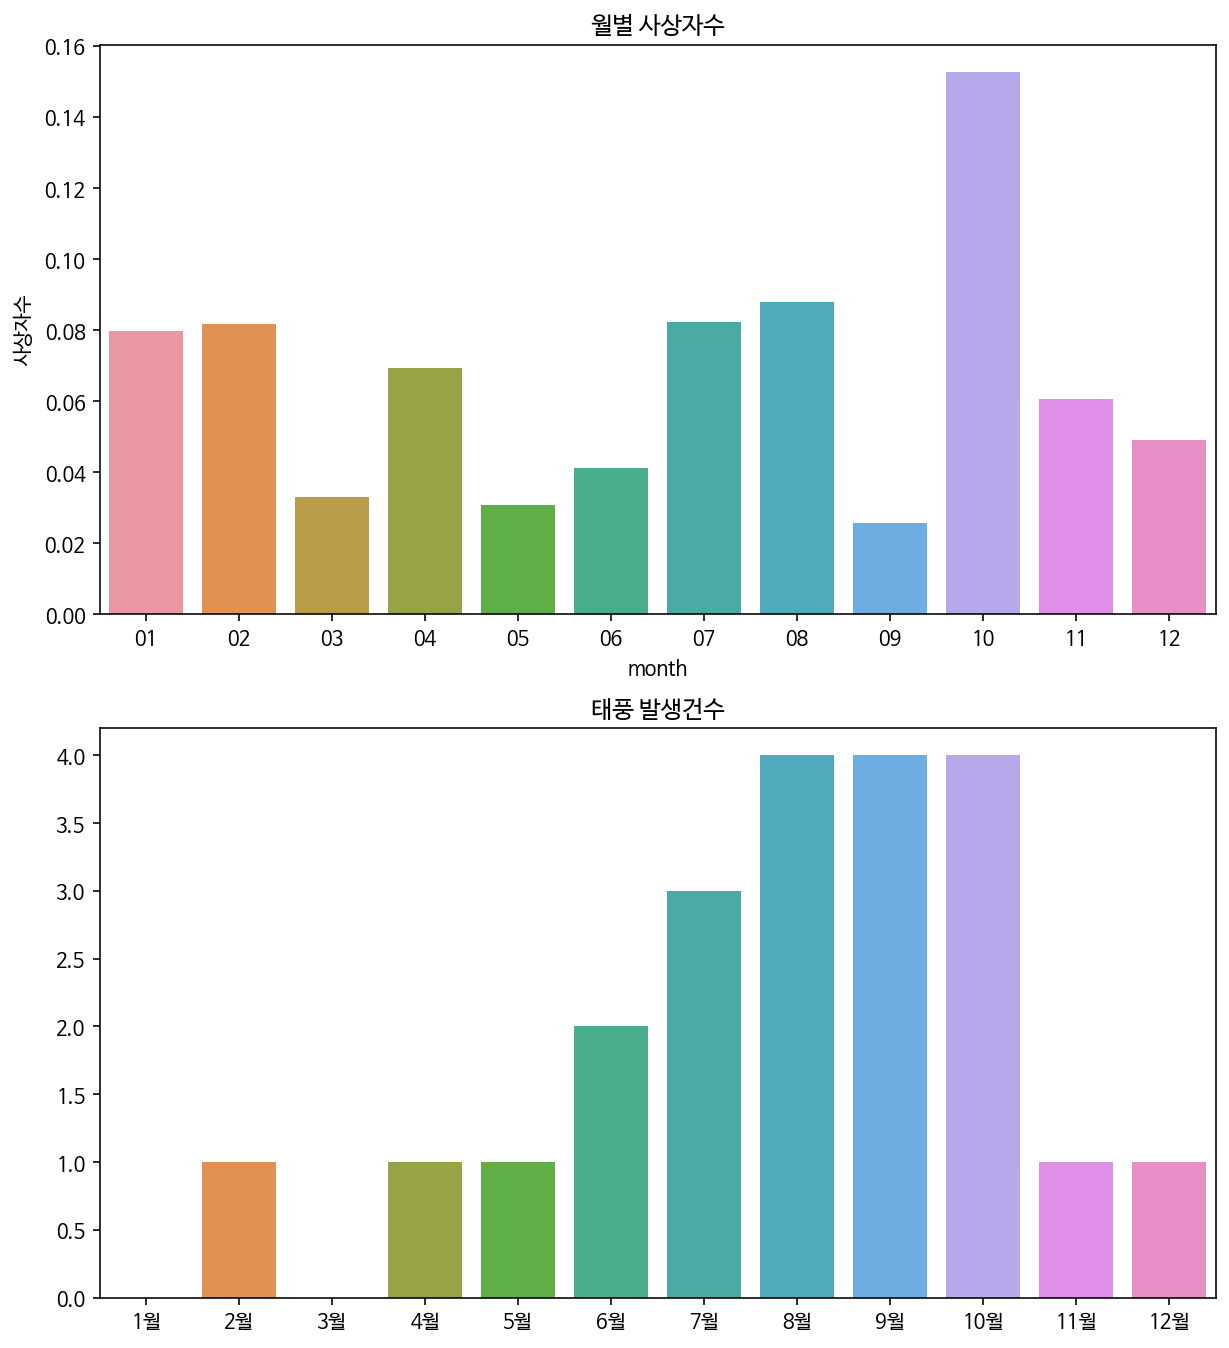

In [ ]:
# 기상상태에 따른 사상자 수 확인
# 월별 사고건수와 태풍 발생건수를 비교해 어떤 연관이 있는지 확인
plt.figure(figsize=(10,10))

plt.subplot(211)
sns.barplot(data = df,x = 'month',y='사상자수',ci=None)
plt.title('월별 사상자수')

plt.subplot(212)
sns.barplot(data = typhoon)
plt.title('태풍 발생건수')

plt.subplots_adjust(bottom=0.01)